<a href="https://colab.research.google.com/github/YuliyaMilk/IS_1/blob/master/DimensionalityReduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install MulticoreTSNE 
#To make the computation log visible in jupyter we should install wurlitzer (pip install wurlitzer) and execute this line in any cell beforehand(%load_ext wurlitzer)
! pip install wurlitzer 
%load_ext wurlitzer
! pip install umap-learn 
#Dataget is an easy to use, framework-agnostic, dataset library that gives you quick access to a collection of Machine Learning datasets through a simple API.
! pip install dataget
! pip install --upgrade gensim

from matplotlib import pyplot
import numpy as np
import seaborn as sns
import dataget
import gensim.downloader as api
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.datasets import mnist

from MulticoreTSNE import MulticoreTSNE
from sklearn.decomposition import PCA
from umap import UMAP

  Created wheel for MulticoreTSNE: filename=MulticoreTSNE-0.1-cp37-cp37m-linux_x86_64.whl size=68518 sha256=89e93d6cae3c50ffc1b059cf249c07ae989b02020b4221696391c15d4ab38181
  Stored in directory: /root/.cache/pip/wheels/80/47/df/c0d66e9f775f33281c422a1964de86a59c47f93bb8c37643e3
Successfully built MulticoreTSNE
     |████████████████████████████████| 86 kB 2.9 MB/s 
     |████████████████████████████████| 1.1 MB 20.1 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=f8a97188a308c0541265c08795af8adbff48d8842dc5c3d03290b19444cf56a6
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=96299486550298ddcc282d751d6e6ef12f344002d8170222469a2b777e946568
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent

**Загрузка данных**

In [2]:
#COIL20
!wget https://jundongl.github.io/scikit-feature/files/datasets/COIL20.mat?raw=true
!mv COIL20.mat?raw=true coil20.mat 
from scipy import io
#Load and read .mat file
mat_contents = io.loadmat('coil20.mat')
coil20_x_test = mat_contents['X']
coil20_y_test = mat_contents['Y']
mat_contents

--2021-11-21 16:37:41--  https://jundongl.github.io/scikit-feature/files/datasets/COIL20.mat?raw=true
Resolving jundongl.github.io (jundongl.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to jundongl.github.io (jundongl.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3024549 (2.9M) [application/octet-stream]
Saving to: ‘COIL20.mat?raw=true’

COIL20.mat?raw=true 100%[===================>]   2.88M  --.-KB/s    in 0.06s   

2021-11-21 16:37:41 (44.5 MB/s) - ‘COIL20.mat?raw=true’ saved [3024549/3024549]



{'X': array([[0.01568627, 0.01568627, 0.01568627, ..., 0.01568627, 0.01568627,
         0.01568627],
        [0.01960784, 0.01960784, 0.01960784, ..., 0.01960784, 0.01960784,
         0.01960784],
        [0.01568627, 0.01568627, 0.01568627, ..., 0.01568627, 0.01568627,
         0.01568627],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]]), 'Y': array([[ 1],
        [ 1],
        [ 1],
        ...,
        [20],
        [20],
        [20]], dtype=uint8), '__globals__': [], '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Mar 17 16:06:33 2015', '__version__': '1.0'}

In [3]:
#MNIST
(x_train, y_train), (mnist_x_test, mnist_y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
#Fashion MNIST
(X_train, Y_train), (fash_x_test, fash_y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


**Алгоритмы**

In [5]:
tsne = MulticoreTSNE()
pca = PCA()
umap = UMAP()

algorithms = [umap, tsne, pca]

**Визуализация**

In [12]:
def visual_data (fig, title, x_transformed, target, ax):
  x_test = x_transformed[:, 0]
  y_test = x_transformed[:, 1]
  scatter = ax.scatter(x_test, y_test, c=target, cmap='Spectral', marker='.')
  ax.set_title(title, fontsize=13)

## COIL 20

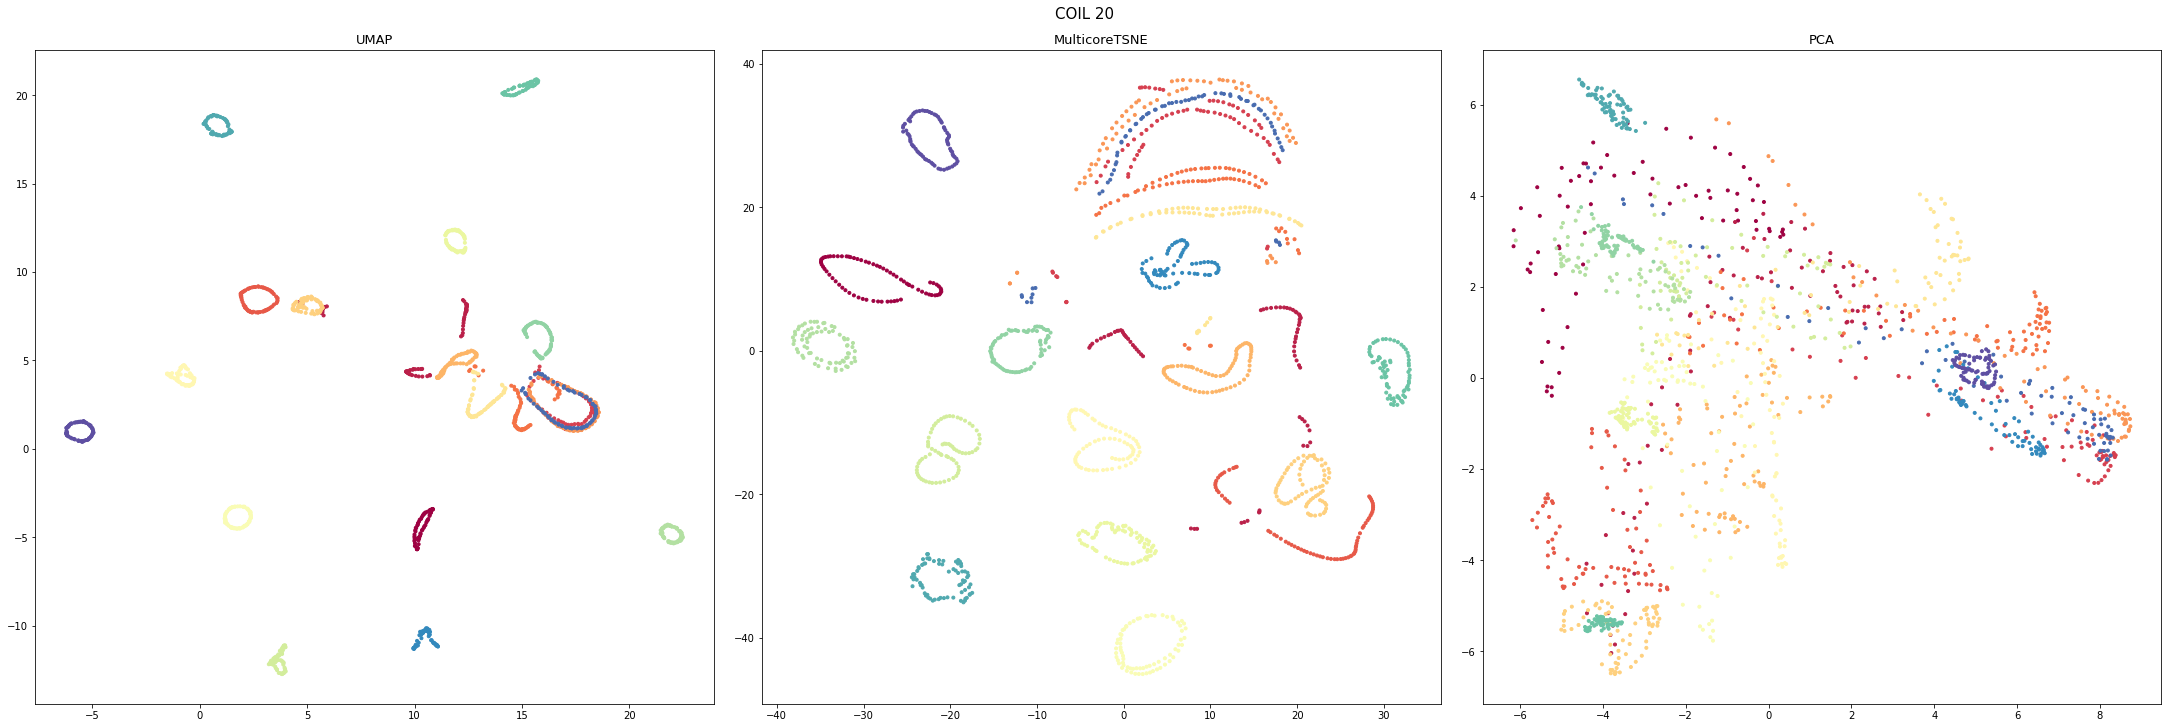

In [13]:
pyplot.rcParams["figure.figsize"] = (30, 10)

fig, (ax1, ax2, ax3) = pyplot.subplots(1, 3, constrained_layout=True)

data, target, axes = coil20_x_test, coil20_y_test, [ax1, ax2, ax3]
for alg, ax in np.vstack([algorithms, axes]).T:
  x_transformed = alg.fit_transform(data)
  visual_data(fig, type(alg).__name__, x_transformed, target, ax)

fig.suptitle('COIL 20', fontsize=15)
pyplot.show()

## MNIST

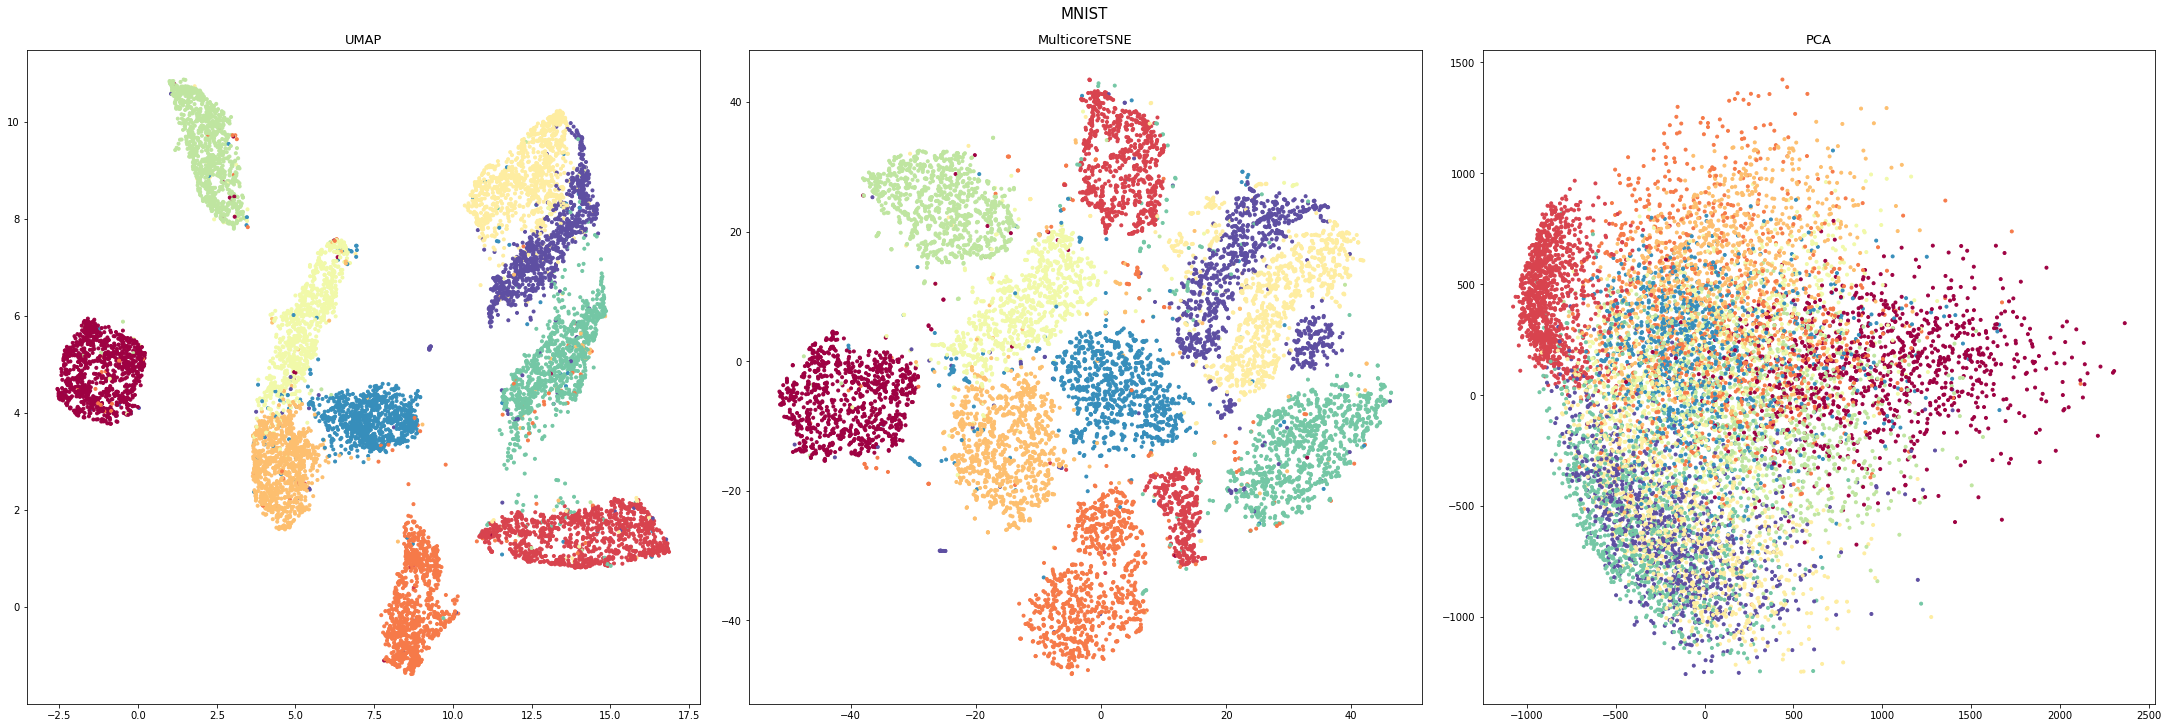

In [15]:
pyplot.rcParams["figure.figsize"] = (30,10)

fig, (ax1, ax2, ax3) = pyplot.subplots(1, 3, constrained_layout=True) 

nsamples, nx, ny = mnist_x_test.shape
mnist_d = mnist_x_test.reshape((nsamples,nx*ny))
data, target, axes = mnist_d,  mnist_y_test, [ax1, ax2, ax3]
for alg, ax in np.vstack([algorithms, axes]).T:
  x_transformed = alg.fit_transform(data)
  visual_data(fig, type(alg).__name__, x_transformed, target, ax)

fig.suptitle('MNIST', fontsize=15)
pyplot.show()

## Fashion MNIST

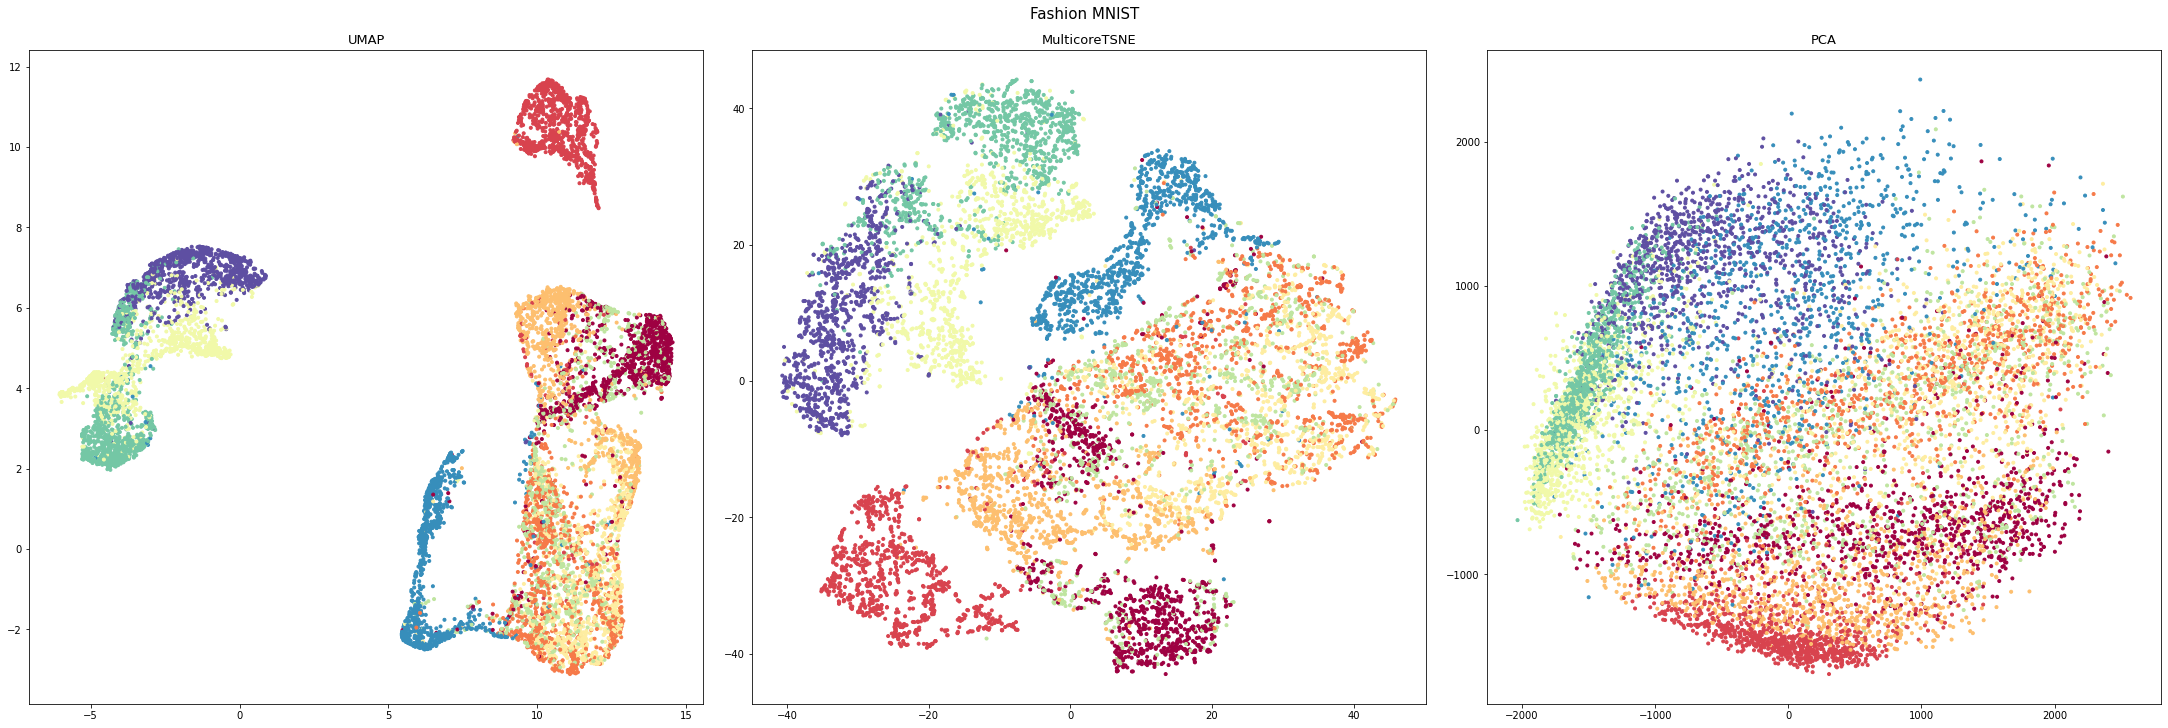

In [16]:
pyplot.rcParams["figure.figsize"] = (30, 10)

fig, (ax1, ax2, ax3) = pyplot.subplots(1, 3, constrained_layout=True) 

# FASHION MNIST
nsamples, nx, ny = fash_x_test.shape
fashion_mnist = fash_x_test.reshape((nsamples,nx*ny))
data, target, axes = fashion_mnist, fash_y_test, [ax1, ax2, ax3]
for alg, ax in np.vstack([algorithms, axes]).T:
  x_transformed = alg.fit_transform(data)
  visual_data(fig, type(alg).__name__, x_transformed, target, ax)

fig.suptitle('Fashion MNIST', fontsize=15)
pyplot.show()

T-SNE и UMAP лучше справляются с сохранением локальной структуры данных.
UMAP намного быстрее и более вычислительно эффективен, чем t-SNE, а также лучше справляется с задачей переноса глобальной структуры данных в новое, уменьшенное пространство.

UMAP в принципе и глобальную структуру сохраняет


## GOOGLE NEWS

ОЗУ колаба не хватает на обработку всего датасета,поэтому загрузим только часть его((100000, 300)).

In [17]:
from MulticoreTSNE import MulticoreTSNE
from sklearn.decomposition import PCA
from umap import UMAP
import numpy as np
from matplotlib import pyplot
import gensim.downloader as api
from gensim.models import KeyedVectors

tsne = MulticoreTSNE()
pca = PCA()
umap = UMAP()


In [18]:
!brew install wget

!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"



/bin/bash: brew: command not found
--2021-11-21 16:58:09--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.10.93
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.10.93|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  64.2MB/s    in 24s     

2021-11-21 16:58:33 (64.5 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [19]:
word_vectors = KeyedVectors.load_word2vec_format('/content/GoogleNews-vectors-negative300.bin.gz',binary=True)
word_vectors=word_vectors.vectors

tcmalloc: large alloc 3600007168 bytes == 0x55c30ba1a000 @  0x7f212208a001 0x7f21194bd54f 0x7f211950db58 0x7f2119511b17 0x7f21195b0203 0x55c2cfe89544 0x55c2cfe89240 0x55c2cfefd627 0x55c2cfef79ee 0x55c2cfe8b48c 0x55c2cfecc159 0x55c2cfec90a4 0x55c2cfe89d49 0x55c2cfefd94f 0x55c2cfef79ee 0x55c2cfe8abda 0x55c2cfef9737 0x55c2cfef79ee 0x55c2cfe8abda 0x55c2cfef9737 0x55c2cfef79ee 0x55c2cfef76f3 0x55c2cfef5b60 0x55c2cfe89349 0x55c2cfe89240 0x55c2cfefc973 0x55c2cfef79ee 0x55c2cfe8abda 0x55c2cfef8c0d 0x55c2cfef79ee 0x55c2cfe8abda


In [23]:
googlenews_data = word_vectors[np.random.randint(word_vectors.shape[0], size=int(word_vectors.shape[0]/30)), :]
googlenews_data.shape

(100000, 300)

In [21]:
def visual_data(fig, title, x_transformed, ax):
  x_test = x_transformed[:, 0]
  y_test = x_transformed[:, 1]
  print(x_test)
  scatter = ax.scatter(x_test, y_test, alpha=0.3, marker='.')
  ax.set_title(title)

**GOOGLE NEWS**

**UMAP**

[[-0.31984925  2.4383736 ]
 [ 4.041208    3.5706327 ]
 [-0.6396023   6.008419  ]
 ...
 [ 3.542428    6.9365277 ]
 [ 4.6596727   4.936859  ]
 [-1.0519729   1.4820262 ]]
[-0.31984925  4.041208   -0.6396023  ...  3.542428    4.6596727
 -1.0519729 ]


<Figure size 1080x1080 with 0 Axes>

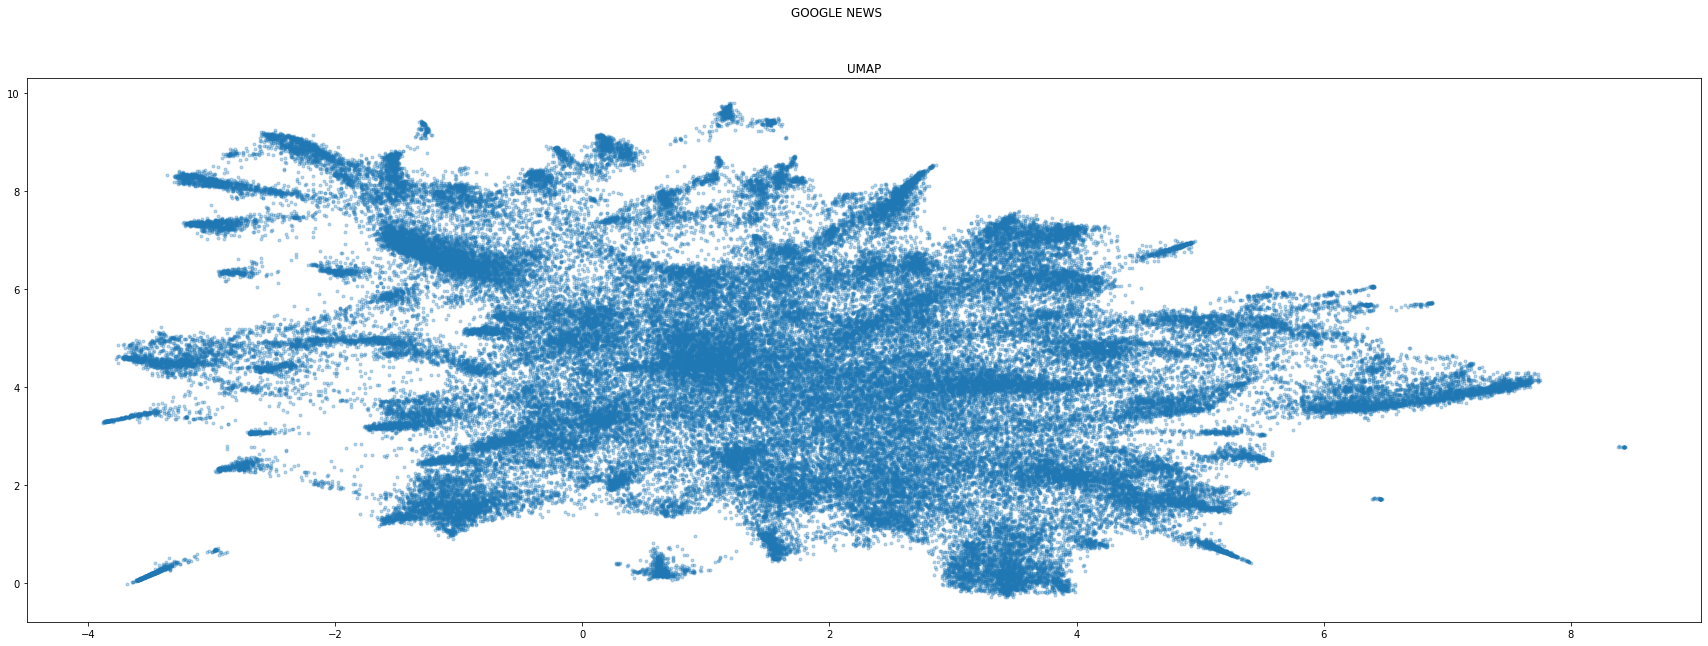

In [25]:
# GOOGLE NEWS
!pip install --upgrade tbb
pyplot.figure(figsize=(15, 15))

#UMAP

fig, ax = pyplot.subplots()
x_transformed = umap.fit_transform(googlenews_data)
print(x_transformed)
visual_data(fig, 'UMAP', x_transformed, ax)
fig.suptitle('GOOGLE NEWS')

pyplot.show()


**t-SNE**

In [ ]:
#t-SNE

fig, ax = pyplot.subplots()
x_transformed = tsne.fit_transform(googlenews_data)
visual_data(fig, 't-SNE', x_transformed, ax)
fig.suptitle('GOOGLE NEWS')

pyplot.show()

**PCA**

In [ ]:
#PCA

fig, ax = pyplotS.subplots()
x_transformed = pca.fit_transform(googlenews_data)
visual_data(fig, 'PCA', x_transformed, ax)
fig.suptitle('GOOGLE NEWS')

pyplot.show()


NameError: ignored